In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import matplotlib.font_manager as font_manager
from os.path import expanduser
import matplotlib as mpl
fontpath = expanduser("/Users/aneeshr/Library/Fonts/LinLibertine_aS.ttf")
prop = font_manager.FontProperties(fname=fontpath)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['text.usetex'] = True
mpl.rcParams.update({'font.size': 12})

In [4]:
gen_dir = "./BEBP/"
osm_dir = "./OSM/"

In [5]:
l_percentage = "50-L"

In [6]:
gen_file = gen_dir + "results_50l.csv"
osm_file = osm_dir + "results_50l.csv"

In [7]:
gen_header = ["num_elements", "k%", "l%", "cache_capacity","duration", "reads","writes","leaf_cache_misses","internal_cache_misses", "leaf_cache_hits","internal_cache_hits","cache_reqs","av_fanout","max_fanout","min_fanout","med_fanout","num_int","num_leafs","av_buff","max_buff","min_buff","med_buff","depth","BPLUS"]
osm_header = ["num_elements", "k%", "l%", "cache_capacity","duration","counter","num_flushes", "total_sort","num_quick","num_adaptive", "num_adaptive_fail","reads","writes","leaf_cache_misses","internal_cache_misses", "leaf_cache_hits","internal_cache_hits","cache_reqs",",","av_fanout","max_fanout","min_fanout","med_fanout","num_int","num_leafs","av_buff","max_buff","min_buff","med_buff","depth","BPLUS","nops","osm_fence_queries","osm_fence_positive","unsorted_zonemap_queries","unsorted_zonemap_positive","num_seq_scan","global_bf_queried","global_bf_positive","num_zones_queried","num_zones_positive","sublevel_bf_queried","sublevel_bf_positive","seq_zone_queries","seq_zone_positive","num_seq_found","sorted_zonemap_queries","sorted_zonemap_positive","num_bin_scan","num_bin_found","tree_zone_queries","tree_zone_positive","num_tree_scan","num_tree_found","."]

In [8]:
gen_data = pd.read_csv(gen_file, header=None, names=gen_header)
osm_data = pd.read_csv(osm_file, header=None, names=osm_header)

In [9]:
gen_data.head()

num_elements  k%  l%  cache_capacity      duration   reads  writes  \
0      50000000   0  50          500000  164120466506  219580       0   
1      50000000   0  50          500000  409749659098  199222       0   
2      50000000   1  50          500000  450794421913  214894       0   
3      50000000   1  50          500000  460423538580  195773       0   
4      50000000  10  50          500000  576316896716  186687       0   

   leaf_cache_misses  internal_cache_misses  leaf_cache_hits  ...  min_fanout  \
0                  0                 219580         17990629  ...          10   
1                  0                 199222        662769326  ...          12   
2                  0                 214894         19121649  ...          10   
3                  0                 195773        662136676  ...          12   
4                  0                 186687         20468693  ...          10   

   med_fanout  num_int  num_leafs  av_buff  max_buff  min_buff  med_buff  \
0          10    21955     197625        0       226         0         0   
1         125     1594     197628        0         0         0         0   
2          10    21348     193546       28       230         0         0   
3         125     1556     194217        0         0         0         0   
4          10    17490     169197      186       230         0       197   

   depth  BPLUS  
0      5  False  
1      3   True  
2      5  False  
3      3   True  
4      5  False  

[5 rows x 24 columns]

In [10]:
osm_data.head()

num_elements  k%  l%  cache_capacity      duration   counter  num_flushes  \
0      50000000   0  50          500000   87175727092         0       103752   
1      50000000   0  50          500000   83233865669         0       103752   
2      50000000   1  50          500000  147561995938    524700       103722   
3      50000000   1  50          500000  141855774501    524700       103722   
4      50000000  10  50          500000  518773194212  47156697       103672   

   total_sort  num_quick  num_adaptive  ...  num_seq_found  \
0           0          0             0  ...              0   
1           0          0             0  ...              0   
2         347        308            39  ...          81051   
3         347        308            39  ...          81087   
4         338        277            61  ...          71720   

   sorted_zonemap_queries  sorted_zonemap_positive  num_bin_scan  \
0                  258657                   258657        258657   
1                  258498                   258498        258498   
2                 4888627                   401065        401065   
3                 4888457                   399250        399250   
4                 4924022                   626209        626209   

   num_bin_found  tree_zone_queries  tree_zone_positive  num_tree_scan  \
0         258656            4741344             4741343        4741344   
1         258498            4741502             4741502        4741502   
2         120998            4797951             4795235        4797951   
3         120420            4798493             4795724        4798493   
4          40890            4887390             4887390        4887390   

   num_tree_found   .  
0         4741343 NaN  
1         4741502 NaN  
2         4736215 NaN  
3         4736409 NaN  
4         4289332 NaN  

[5 rows x 55 columns]

In [11]:
# osm_data = osm_data[osm_data["ins_writes"]!=0]

In [12]:
nano_to_seconds = 1e9

In [13]:
be_data = gen_data[gen_data["BPLUS"]==False]
bp_data = gen_data[gen_data["BPLUS"]==True]

In [14]:
osm_be_data = osm_data[osm_data["BPLUS"]==False]
osm_bp_data = osm_data[osm_data["BPLUS"]==True]

In [15]:
be_data = be_data.sort_values("k%")
bp_data = bp_data.sort_values("k%")
osm_be_data = osm_be_data.sort_values("k%")
osm_bp_data = osm_bp_data.sort_values("k%")

In [16]:
osm_be_data

num_elements  k%  l%  cache_capacity      duration   counter  num_flushes  \
0       50000000   0  50          500000   87175727092         0       103752   
2       50000000   1  50          500000  147561995938    524700       103722   
8       50000000   2  50          500000  348453741137  37205523       104063   
12      50000000   3  50          500000  407279728460  42682437       103579   
14      50000000   5  50          500000  456959210870  45774828       103978   
4       50000000  10  50          500000  518773194212  47156697       103672   
6       50000000  15  50          500000  581161531954  47220138       103775   
10      50000000  25  50          500000  623538720068  47505384       104017   
16      50000000  50  50          500000  650956184283  46723581       104035   

    total_sort  num_quick  num_adaptive  ...  num_seq_found  \
0            0          0             0  ...              0   
2          347        308            39  ...          81051   
8          346        297            49  ...          80368   
12         348        293            55  ...          79222   
14         339        278            61  ...          78657   
4          338        277            61  ...          71720   
6          347        294            53  ...          66316   
10         346        303            44  ...          57452   
16         348        330            19  ...          36073   

    sorted_zonemap_queries  sorted_zonemap_positive  num_bin_scan  \
0                   258657                   258657        258657   
2                  4888627                   401065        401065   
8                  4902790                   539448        539448   
12                 4911177                   625123        625123   
14                 4914737                   441789        441789   
4                  4924022                   626209        626209   
6                  4931210                   523509        523509   
10                 4940916                   608884        608884   
16                 4962632                   482279        482279   

    num_bin_found  tree_zone_queries  tree_zone_positive  num_tree_scan  \
0          258656            4741344             4741343        4741344   
2          120998            4797951             4795235        4797951   
8           59949            4859683             4855901        4859683   
12          80230            4840548             4838610        4840548   
14          68778            4852565             4852565        4852565   
4           40890            4887390             4887390        4887390   
6           18444            4915240             4915240        4915240   
10          15022            4927526             4927526        4927526   
16           7346            4956581             4956581        4956581   

    num_tree_found   .  
0          4741343 NaN  
2          4736215 NaN  
8          4735642 NaN  
12         4654341 NaN  
14         4545852 NaN  
4          4289332 NaN  
6          4036300 NaN  
10         3536733 NaN  
16         2542306 NaN  

[9 rows x 55 columns]

In [17]:
osm_bp_data

num_elements  k%  l%  cache_capacity      duration   counter  num_flushes  \
1       50000000   0  50          500000   83233865669         0       103752   
3       50000000   1  50          500000  141855774501    524700       103722   
9       50000000   2  50          500000  461353595485  37205523       104063   
13      50000000   3  50          500000  504097406734  42682437       103579   
15      50000000   5  50          500000  528211839323  45774828       103978   
5       50000000  10  50          500000  555134893363  47156697       103672   
7       50000000  15  50          500000  572831532764  47220138       103775   
11      50000000  25  50          500000  558052240120  47505384       104017   
17      50000000  50  50          500000  566983768314  46723581       104035   

    total_sort  num_quick  num_adaptive  ...  num_seq_found  \
1            0          0             0  ...              0   
3          347        308            39  ...          81087   
9          346        297            49  ...          80107   
13         348        293            55  ...          79221   
15         339        278            61  ...          79632   
5          338        277            61  ...          72463   
7          347        294            53  ...          66773   
11         346        303            44  ...          57930   
17         348        330            19  ...          35876   

    sorted_zonemap_queries  sorted_zonemap_positive  num_bin_scan  \
1                   258498                   258498        258498   
3                  4888457                   399250        399250   
9                  4903257                   537248        537248   
13                 4911187                   624301        624301   
15                 4913753                   438906        438906   
5                  4923387                   627446        627446   
7                  4930663                   525024        525024   
11                 4940427                   606497        606497   
17                 4962789                   483746        483746   

    num_bin_found  tree_zone_queries  tree_zone_positive  num_tree_scan  \
1          258498            4741502             4741502        4741502   
3          120420            4798493             4795724        4798493   
9           58949            4860944             4856907        4860944   
13          80134            4840645             4838795        4840645   
15          69059            4851309             4851309        4851309   
5           40862            4886675             4886675        4886675   
7           18461            4914766             4914766        4914766   
11          14997            4927073             4927072        4927073   
17           7286            4956838             4956838        4956838   

    num_tree_found   .  
1          4741502 NaN  
3          4736409 NaN  
9          4736794 NaN  
13         4655018 NaN  
15         4544465 NaN  
5          4285582 NaN  
7          4035379 NaN  
11         3538489 NaN  
17         2542508 NaN  

[9 rows x 55 columns]

In [18]:
be_times = be_data["duration"].to_list()
be_times = np.divide(be_times, nano_to_seconds)
bp_times = bp_data["duration"].to_list()
bp_times = np.divide(bp_times, nano_to_seconds)

In [19]:
osm_be_times = osm_be_data["duration"].to_list()
osm_be_times = np.divide(osm_be_times, nano_to_seconds)
osm_bp_times = osm_bp_data["duration"].to_list()
osm_bp_times = np.divide(osm_bp_times, nano_to_seconds)

In [20]:
def plot_bars(series1, series2, x_vals, series1_lbl, series2_lbl, exp_type):
    N = len(series1)
    ind = np.arange(N) 
    width = 0.35       
    plt.bar(ind, series1, width, label=series1_lbl)
    plt.bar(ind + width, series2, width,
        label=series2_lbl)
    plt.xticks(ind, x_vals)
    plt.xlabel("Noise(\%)")
    plt.ylabel("Latency(s)")
    plt.legend()
    plt.show()
    plot_name = exp_type+"-"+series1_lbl+"-"+series2_lbl+"_"+l_percentage+".png"
#     plt.savefig("./plots/"+plot_name)
    plt.close()

In [21]:
x_vals = be_data["k%"].to_list()

In [22]:
gen_times_data = {
    "BE": be_times,
    "B+": bp_times,
}

osm_times_data = {
    "BE": osm_be_times,
    "B+": osm_bp_times,
}

In [23]:
osm_times_data

{'BE': array([ 87.17572709, 147.56199594, 348.45374114, 407.27972846,
        456.95921087, 518.77319421, 581.16153195, 623.53872007,
        650.95618428]),
 'B+': array([ 83.23386567, 141.8557745 , 461.35359549, 504.09740673,
        528.21183932, 555.13489336, 572.83153276, 558.05224012,
        566.98376831])}

In [24]:
gen_times_data

{'BE': array([164.12046651, 450.79442191, 477.14402698, 517.00501388,
        552.21985021, 576.31689672, 614.01601757, 693.15538279,
        827.95901331]),
 'B+': array([409.7496591 , 460.42353858, 463.79399863, 468.76641746,
        469.23871249, 469.5593963 , 474.50329371, 490.05591769,
        490.75142463])}

## Plots

### Inserts

Base:  BE


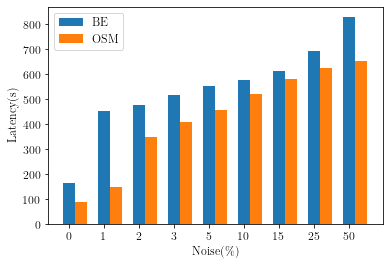

Base:  B+


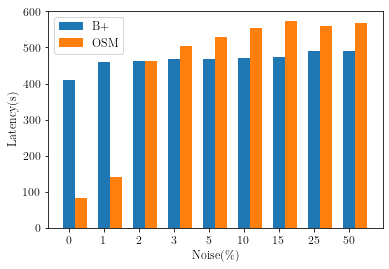

In [25]:
for base in ["BE", "B+"]:
    print("Base: ", base)
    plot_bars(gen_times_data[base], osm_times_data[base], x_vals, base, "OSM", "Mixed")

In [27]:
ls = ["1l", "10l", "25l", "50l"]

In [56]:
ds = {}
osms = []

In [57]:
for l in ls:
    gen_f = gen_dir + "results_"+l+".csv"
    gen_data = pd.read_csv(gen_f, header=None, names=gen_header)
    be_data = gen_data[gen_data["BPLUS"]==False]
    bp_data = gen_data[gen_data["BPLUS"]==True]
    be_data = be_data.sort_values("k%")
    bp_data = bp_data.sort_values("k%")
    be_times = be_data["duration"].to_list()
    be_times = np.divide(be_times, nano_to_seconds)
    bp_times = bp_data["duration"].to_list()
    bp_times = np.divide(bp_times, nano_to_seconds)
    gen_times_data = {
    "BE": be_times,
    "B+": bp_times,
    }
    ds[l] = gen_times_data
    
    osm_f = osm_dir + "results_"+l+".csv"
    osm_data = pd.read_csv(osm_f, header=None, names=osm_header)
    osm_be_data = osm_data[osm_data["BPLUS"]==False]
    osm_bp_data = osm_data[osm_data["BPLUS"]==True]
    osm_be_data = osm_be_data.sort_values("k%")
    osm_bp_data = osm_bp_data.sort_values("k%")
    osm_be_times = osm_be_data["duration"].to_list()
    osm_be_times = np.divide(osm_be_times, nano_to_seconds)
    osm_bp_times = osm_bp_data["duration"].to_list()
    osm_bp_times = np.divide(osm_bp_times, nano_to_seconds)
    
    osms.append(osm_bp_times)

In [58]:
be_t = ds["25l"]["B+"]
be_t

array([409.49094291, 460.15214402, 463.50600443, 463.29766004,
       463.56632981, 467.25565854, 470.28134696, 475.17581602,
       483.94636987])

In [59]:
osms

[array([ 83.05227748, 126.34997328, 124.95245345, 120.07114841,
        118.02589172, 125.28028134, 132.6519831 , 150.95215636,
        195.03277628]),
 array([ 85.01965227, 133.92302664, 142.41125584, 145.86176064,
        157.40176428, 226.06489737, 512.46222558, 499.14623858,
        490.26571698]),
 array([ 83.71252922, 137.97648403, 145.02066482, 157.16878296,
        544.26504199, 529.95541711, 538.59525743, 558.0170952 ,
        542.43183845]),
 array([ 83.23386567, 141.8557745 , 461.35359549, 504.09740673,
        528.21183932, 555.13489336, 572.83153276, 558.05224012,
        566.98376831])]

In [60]:
osms = [np.divide(o, be_t) for o in osms]

In [61]:
std = np.divide(be_t, be_t)

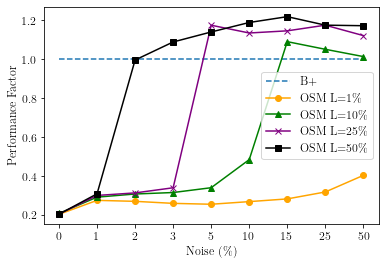

In [64]:
ind = np.arange(len(std))
plt.plot(ind, std, label="B+", linestyle="--")
plt.plot(ind, osms[0], label="OSM L=1\%", c="orange", marker="o")
plt.plot(ind, osms[1], label="OSM L=10\%", c="green", marker="^")
plt.plot(ind, osms[2], label="OSM L=25\%", c="purple", marker="x")
plt.plot(ind, osms[3], label="OSM L=50\%", c="black", marker="s")
plt.xticks(ind, x_vals)
plt.xlabel("Noise (\%)")
plt.ylabel("Performance Factor")
plt.legend()
plt.show()